In [1]:
# importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# get the data and save it into a dataframe.
df= pd.read_excel('Indian_Flights_Dataset.xlsx')
df

,Unnamed: 0,Airline,Flight_ID,Date,Departure Time,Arrival Time,Source,Destination,Duration,Stops,Price,Ticket Status
0,0,Go First,G8-336/398,14 Oct,14:30,22:25,New Delhi,Bangalore,7h 55m,1 Stop,8155,Available
1,1,Go First,G8-323/325,14 Nov,18:05,00:35,New Delhi,Bangalore,6h 30m,1 Stop,8155,Available
2,2,Air India,AI-665/615,8 Dec,08:00,07:30,New Delhi,Hyderabad,23h 30m,1 Stop,9840,1 left
3,3,Go First,G8-286,16 Oct,10:40,15:00,New Delhi,Bangalore,4h 20m,1 Stop,10708,1 left
4,4,Air Asia,I5-711/1453,23 Nov,06:05,12:30,New Delhi,Bangalore,6h 25m,1 Stop,7425,Available
...,...,...,...,...,...,...,...,...,...,...,...,...
59702,59702,Air India,AI-403/656,29 Sep,12:50,19:15,New Delhi,Mumbai,6h 25m,1 Stop,10017,Available
59703,59703,IndiGo,6E-5042/5207,24 Oct,10:15,17:25,New Delhi,Mumbai,7h 10m,1 Stop,7103,Available
59704,59704,Go First,G8-171/394,30 Nov,18:30,04:00,New Delhi,Kolkata,9h 30m,1 Stop,8578,Available
59705,59705,Vistara,UK-829/878/773,30 Oct,07:05,19:55,New Delhi,Kolkata,12h 50m,2 Stop(s),17198,Available


In [3]:
# drop the 'Unnamed: 0' column.
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
# check for duplicate entries.
df.duplicated().value_counts()

False    58793
True       914
dtype: int64

In [5]:
# drop the duplicate entries.
df.drop_duplicates(inplace=True,ignore_index=True)

In [6]:
# check for null values.
df.isnull().sum()

Airline           0
Flight_ID         0
Date              0
Departure Time    0
Arrival Time      0
Source            0
Destination       0
Duration          0
Stops             0
Price             0
Ticket Status     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58793 entries, 0 to 58792
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         58793 non-null  object
 1   Flight_ID       58793 non-null  object
 2   Date            58793 non-null  object
 3   Departure Time  58793 non-null  object
 4   Arrival Time    58793 non-null  object
 5   Source          58793 non-null  object
 6   Destination     58793 non-null  object
 7   Duration        58793 non-null  object
 8   Stops           58793 non-null  object
 9   Price           58793 non-null  int64 
 10  Ticket Status   58793 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.9+ MB


In [8]:
# check the unique values in Airline column.
df['Airline'].unique()

array(['Go First', 'Air India', 'Air Asia', 'Vistara', 'IndiGo',
       'SpiceJet'], dtype=object)

In [9]:
len(df['Flight_ID'].unique())

1826

In [10]:
# The entries in Date column are in text format.
df['Date'][0:5]

0    14 Oct
1    14 Nov
2     8 Dec
3    16 Oct
4    23 Nov
Name: Date, dtype: object

In [11]:
# Extracting the Day and Month from the Date column into separate columns.
# Remove the Date column after extraction done.
days=[]
months=[]
for i in range(len(df['Date'])):
    check1= df['Date'][i].find('Sep')
    check2= df['Date'][i].find('Oct')
    check3= df['Date'][i].find('Nov')
    check4= df['Date'][i].find('Dec')
    components=df['Date'][i].split(' ')
    if check1!=(-1):
        days.append(components[0])
        months.append(9)
    elif check2!=(-1):
        days.append(components[0])
        months.append(10)
    elif check3!=(-1):
        days.append(components[0])
        months.append(11)
    elif check4!=(-1):
        days.append(components[0])
        months.append(12)
    else:
        pass
df['Day']=pd.to_numeric(days)
df['Month']=months
df.drop(columns=['Date'],inplace=True)
df.head()

,Airline,Flight_ID,Departure Time,Arrival Time,Source,Destination,Duration,Stops,Price,Ticket Status,Day,Month
0,Go First,G8-336/398,14:30,22:25,New Delhi,Bangalore,7h 55m,1 Stop,8155,Available,14,10
1,Go First,G8-323/325,18:05,00:35,New Delhi,Bangalore,6h 30m,1 Stop,8155,Available,14,11
2,Air India,AI-665/615,08:00,07:30,New Delhi,Hyderabad,23h 30m,1 Stop,9840,1 left,8,12
3,Go First,G8-286,10:40,15:00,New Delhi,Bangalore,4h 20m,1 Stop,10708,1 left,16,10
4,Air Asia,I5-711/1453,06:05,12:30,New Delhi,Bangalore,6h 25m,1 Stop,7425,Available,23,11


In [12]:
# Convert the 'Departure Time' column to datetime format and convert it to 24 hours format of float-datatype
df['Departure Time']=pd.to_datetime(df['Departure Time'],format='%H:%M')
x=df['Departure Time'].dt.hour+df['Departure Time'].dt.minute/60
df['Departure Time']=x
df.head()

,Airline,Flight_ID,Departure Time,Arrival Time,Source,Destination,Duration,Stops,Price,Ticket Status,Day,Month
0,Go First,G8-336/398,14.500000,22:25,New Delhi,Bangalore,7h 55m,1 Stop,8155,Available,14,10
1,Go First,G8-323/325,18.083333,00:35,New Delhi,Bangalore,6h 30m,1 Stop,8155,Available,14,11
2,Air India,AI-665/615,8.000000,07:30,New Delhi,Hyderabad,23h 30m,1 Stop,9840,1 left,8,12
3,Go First,G8-286,10.666667,15:00,New Delhi,Bangalore,4h 20m,1 Stop,10708,1 left,16,10
4,Air Asia,I5-711/1453,6.083333,12:30,New Delhi,Bangalore,6h 25m,1 Stop,7425,Available,23,11


In [13]:
# The h and m in duration data is removed and only numerics are extracted to a list in string format.
duratn=[]
for i in range(len(df['Duration'])):
    components= df['Duration'][i].strip().split(" ")
    if len(components)==2:
        hour= components[0].split("h")[0]
        minute=components[1].split("m")[0]
        hour=int(hour)
        minute=int(minute)/60
        duratn.append(hour+minute)
    elif (len(components)==1) & (components[0].find("h")!=(-1)):
        hour= components[0].split("h")[0]
        hour=int(hour)
        duratn.append(hour)
    elif (len(components)==1) & (components[0].find("m")!=(-1)):
        hour=0
        minute=components[0].split("m")[0]
        minute=int(minute)/60
        duratn.append(hour+minute)
    else:
        duratn.append(df['Duration'][i])
        
# duration data is converted to numeric format.
df['Duration']= pd.to_numeric(duratn)
df.head()

,Airline,Flight_ID,Departure Time,Arrival Time,Source,Destination,Duration,Stops,Price,Ticket Status,Day,Month
0,Go First,G8-336/398,14.500000,22:25,New Delhi,Bangalore,7.916667,1 Stop,8155,Available,14,10
1,Go First,G8-323/325,18.083333,00:35,New Delhi,Bangalore,6.500000,1 Stop,8155,Available,14,11
2,Air India,AI-665/615,8.000000,07:30,New Delhi,Hyderabad,23.500000,1 Stop,9840,1 left,8,12
3,Go First,G8-286,10.666667,15:00,New Delhi,Bangalore,4.333333,1 Stop,10708,1 left,16,10
4,Air Asia,I5-711/1453,6.083333,12:30,New Delhi,Bangalore,6.416667,1 Stop,7425,Available,23,11


In [14]:
# Dropping the 'Arrival Time' column as we already have the information about departure time and duration of flight.
# Dropping the 'Source' column as all flights originate from the same city.
df.drop(columns=['Arrival Time','Source'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58793 entries, 0 to 58792
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         58793 non-null  object 
 1   Flight_ID       58793 non-null  object 
 2   Departure Time  58793 non-null  float64
 3   Destination     58793 non-null  object 
 4   Duration        58793 non-null  float64
 5   Stops           58793 non-null  object 
 6   Price           58793 non-null  int64  
 7   Ticket Status   58793 non-null  object 
 8   Day             58793 non-null  int64  
 9   Month           58793 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 4.5+ MB


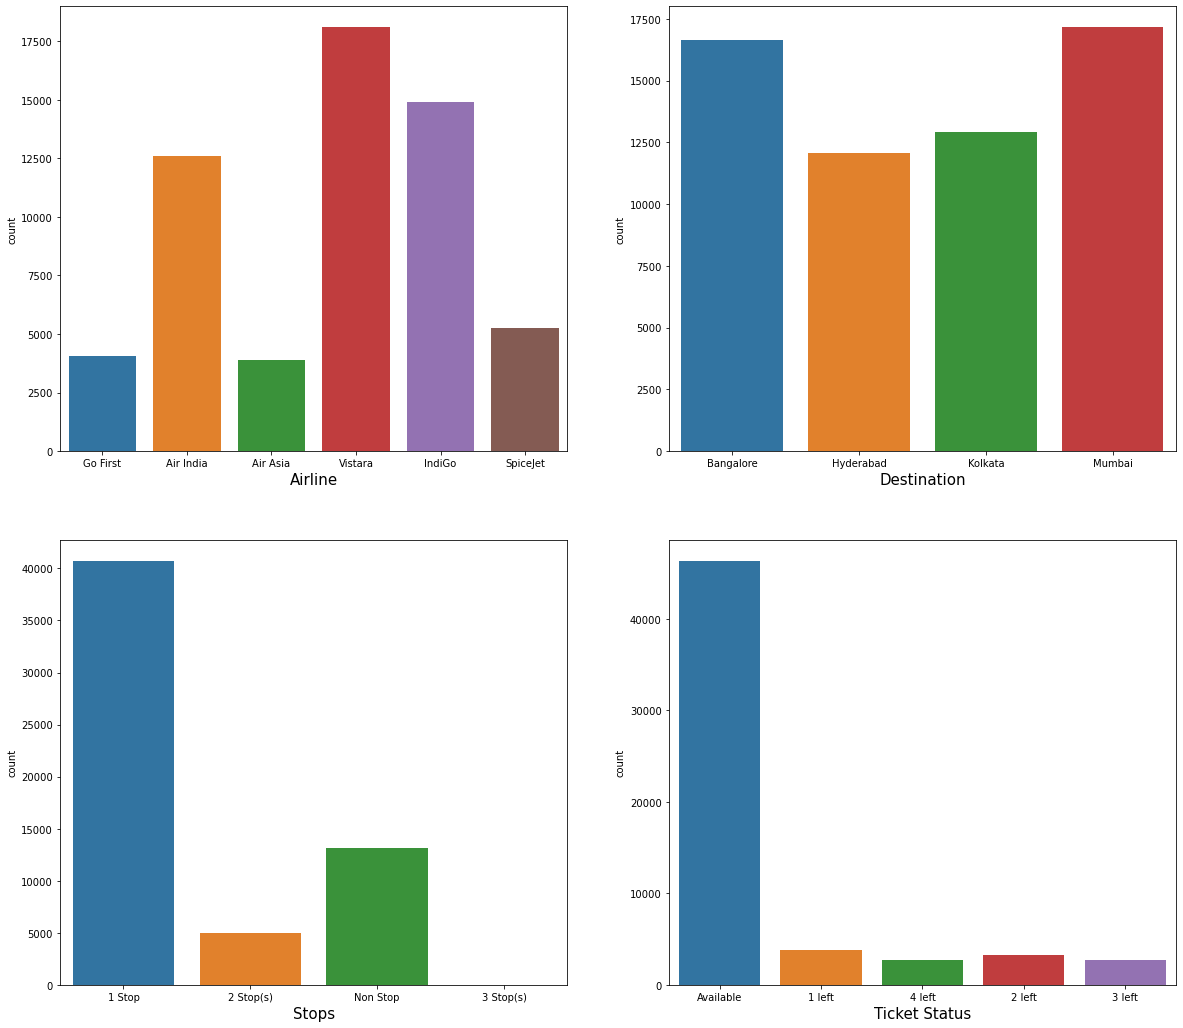

In [16]:
# Count plots of some categorical columns.
cat_features= ['Airline','Destination','Stops','Ticket Status']
plt.figure(figsize=(20,18))
plotnumber=1
for feature in cat_features:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.countplot(df[feature])
        plt.xlabel(feature,fontsize=15)
        if feature=='Location':
            plt.xticks(rotation=20)
    plotnumber+=1
plt.show()

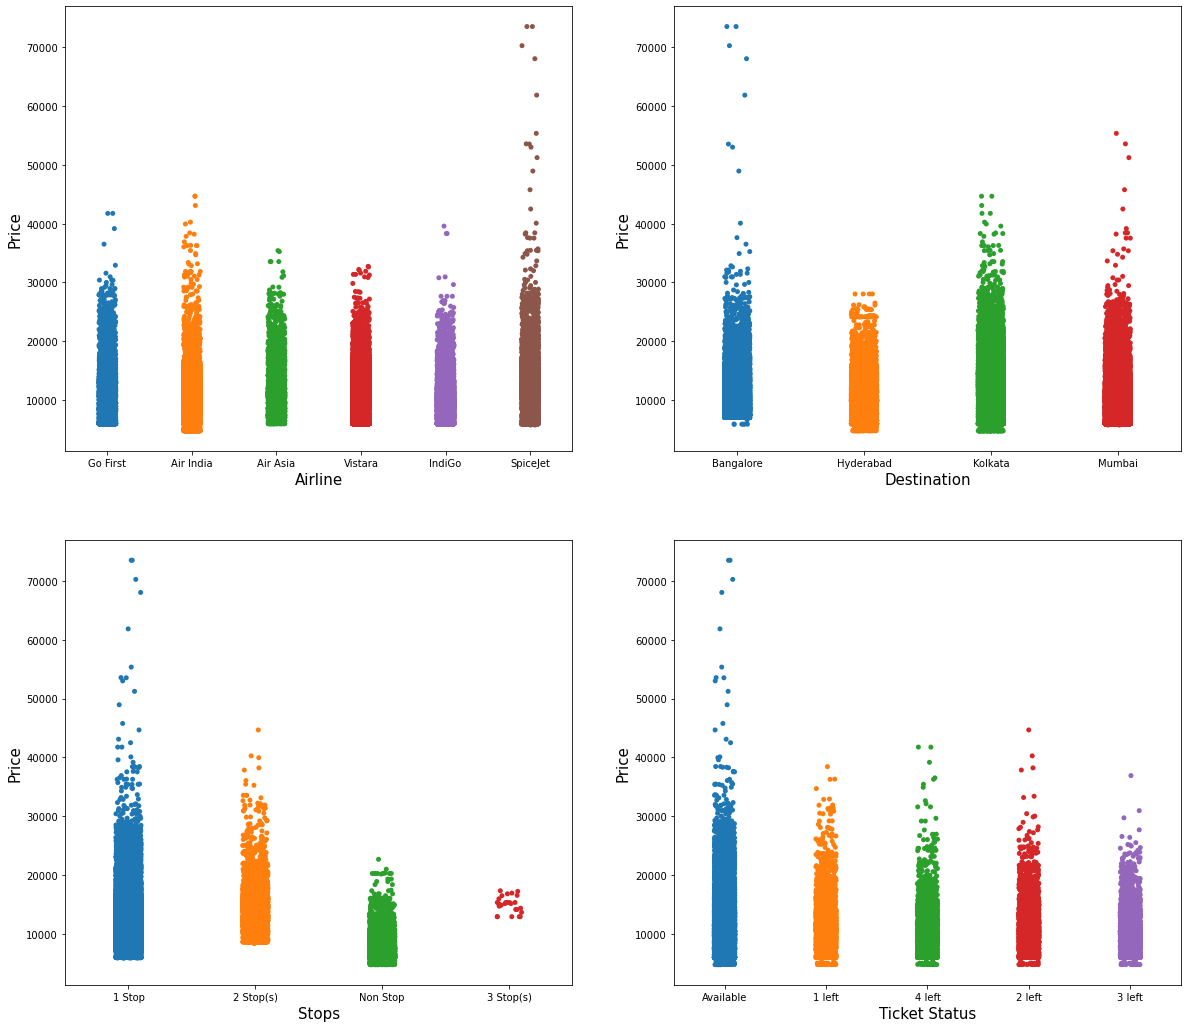

In [17]:
# Strip-plots of some of the categorical features with respect to the target variable i.e 'Price'.
plt.figure(figsize=(20,18))
plotnumber=1
for i in cat_features:
    plt.subplot(2,2,plotnumber)
    sns.stripplot(x=i,y='Price',data=df)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Price',fontsize=15)
    plotnumber+=1

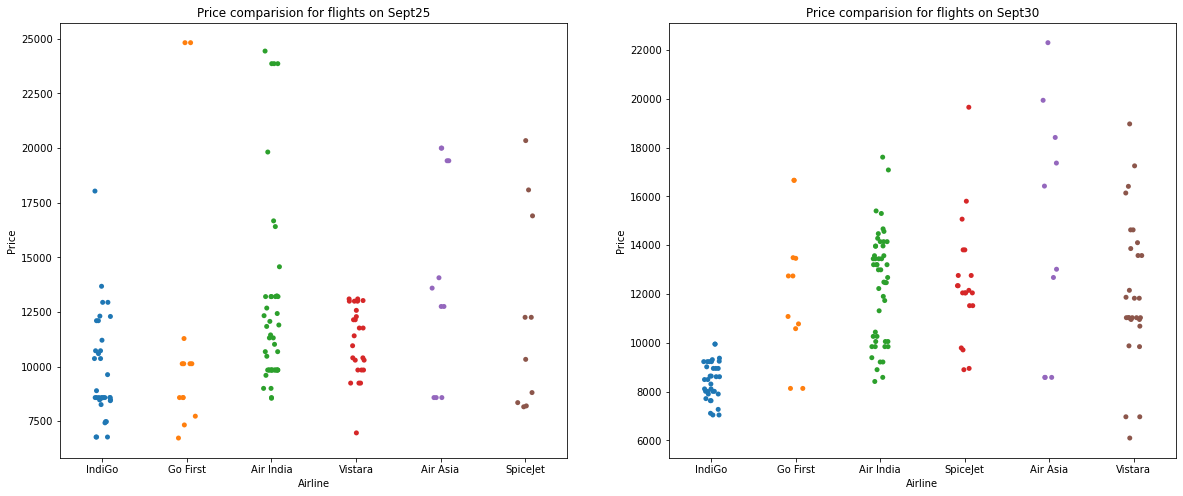

In [18]:
# Plots to compare price among different airlines on different dates in the month of September.
# These plots are for New Delhi-Mumbai route having 1 stop during the journey.

plt.figure(figsize=(20,8))
plotnumber=1
for day in [25,30]:
    flight_df=df[(df['Destination']=='Mumbai')&(df['Stops']=='1 Stop')&(df['Month']==9)&(df['Day']==day)]
    plt.subplot(1,2,plotnumber)
    sns.stripplot(x='Airline',y='Price',data=flight_df)
    plt.title(f'Price comparision for flights on Sept{day}')
    plotnumber+=1

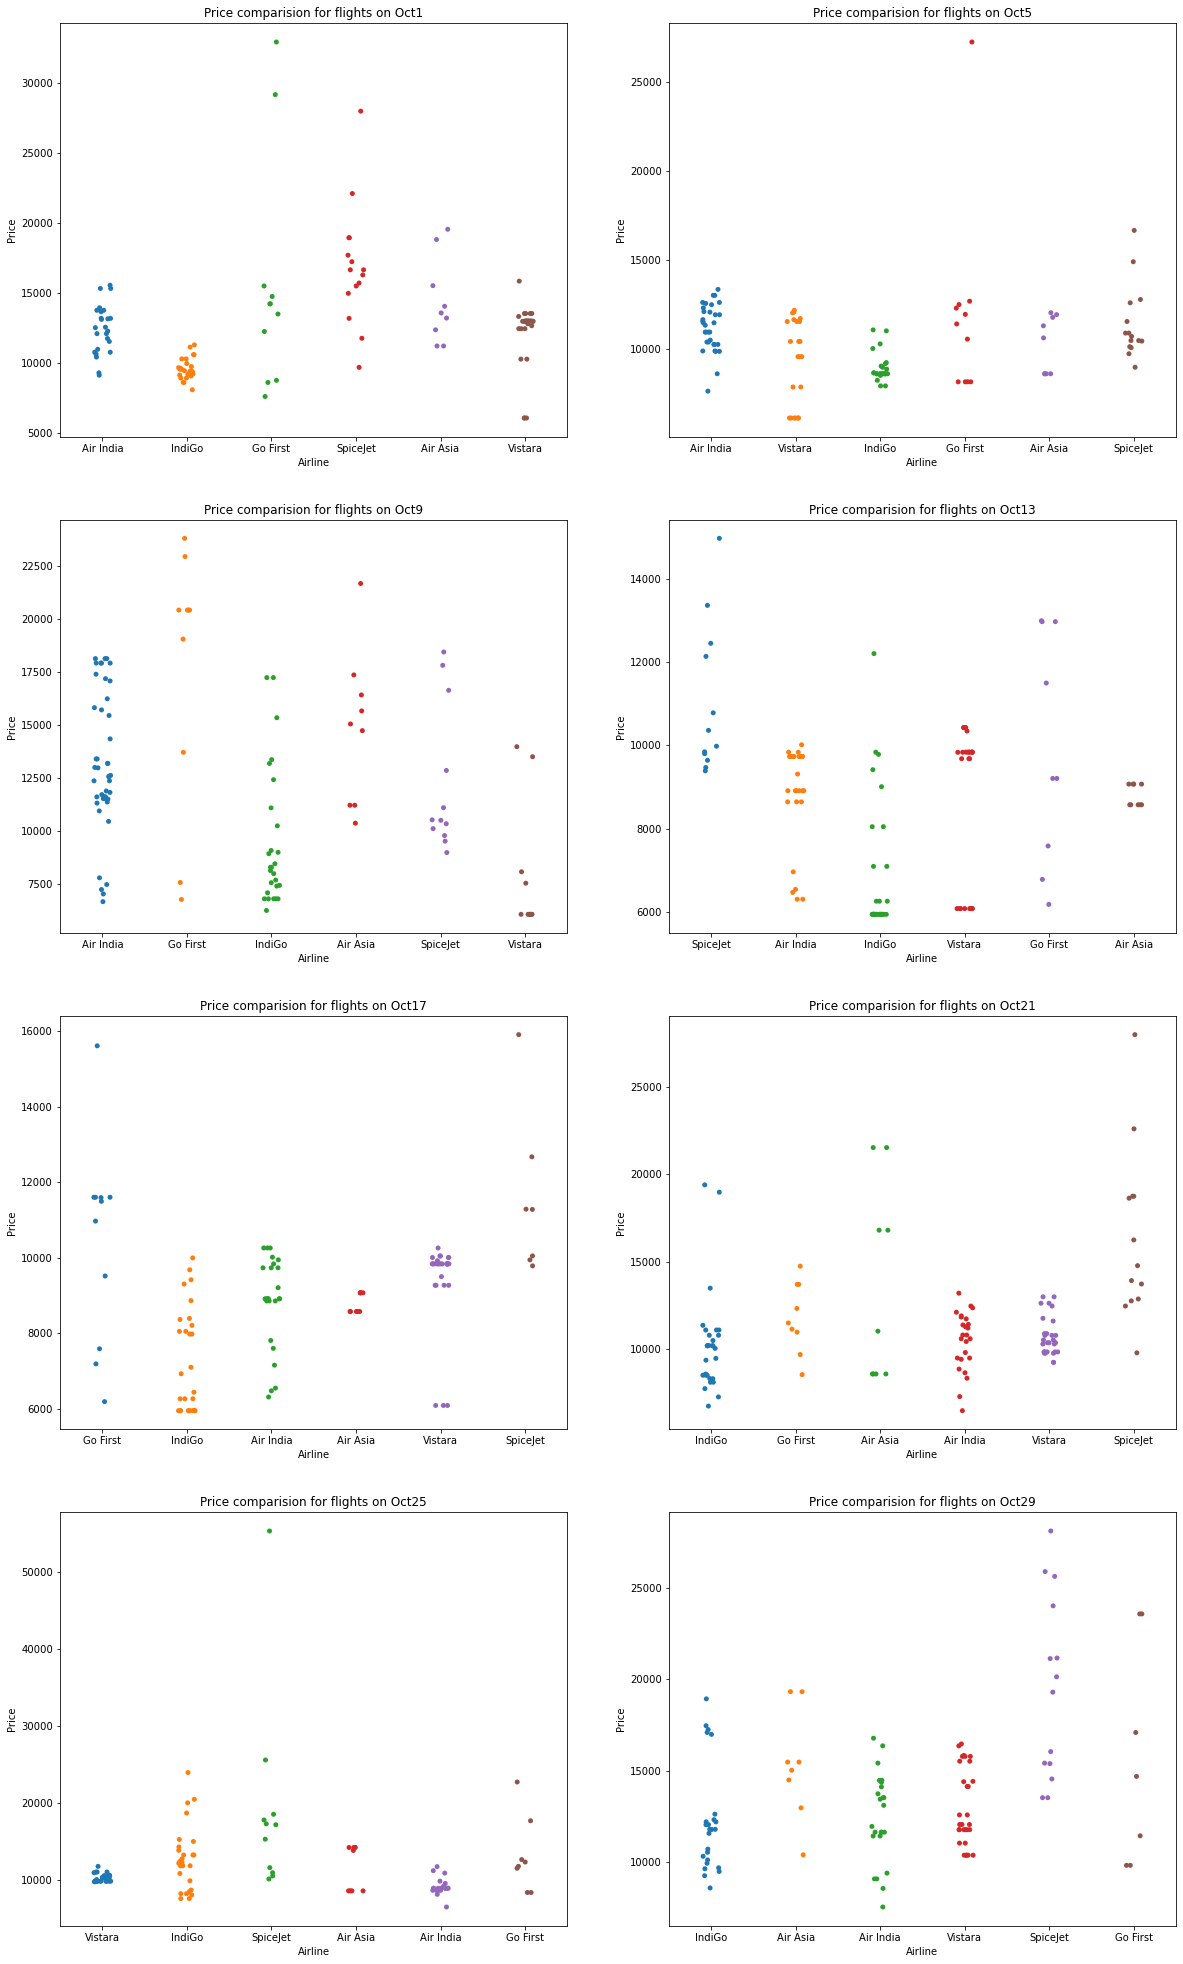

In [19]:
# Plots to compare price among different airlines on different dates in the month of October.
# These plots are for New Delhi-Mumbai route having 1 stop during the journey.

plt.figure(figsize=(20,35))
plotnumber=1
for day in np.arange(1,31,4):
    flight_df=df[(df['Destination']=='Mumbai')&(df['Stops']=='1 Stop')&(df['Month']==10)&(df['Day']==day)]
    plt.subplot(4,2,plotnumber)
    sns.stripplot(x='Airline',y='Price',data=flight_df)
    plt.title(f'Price comparision for flights on Oct{day}')
    plotnumber+=1

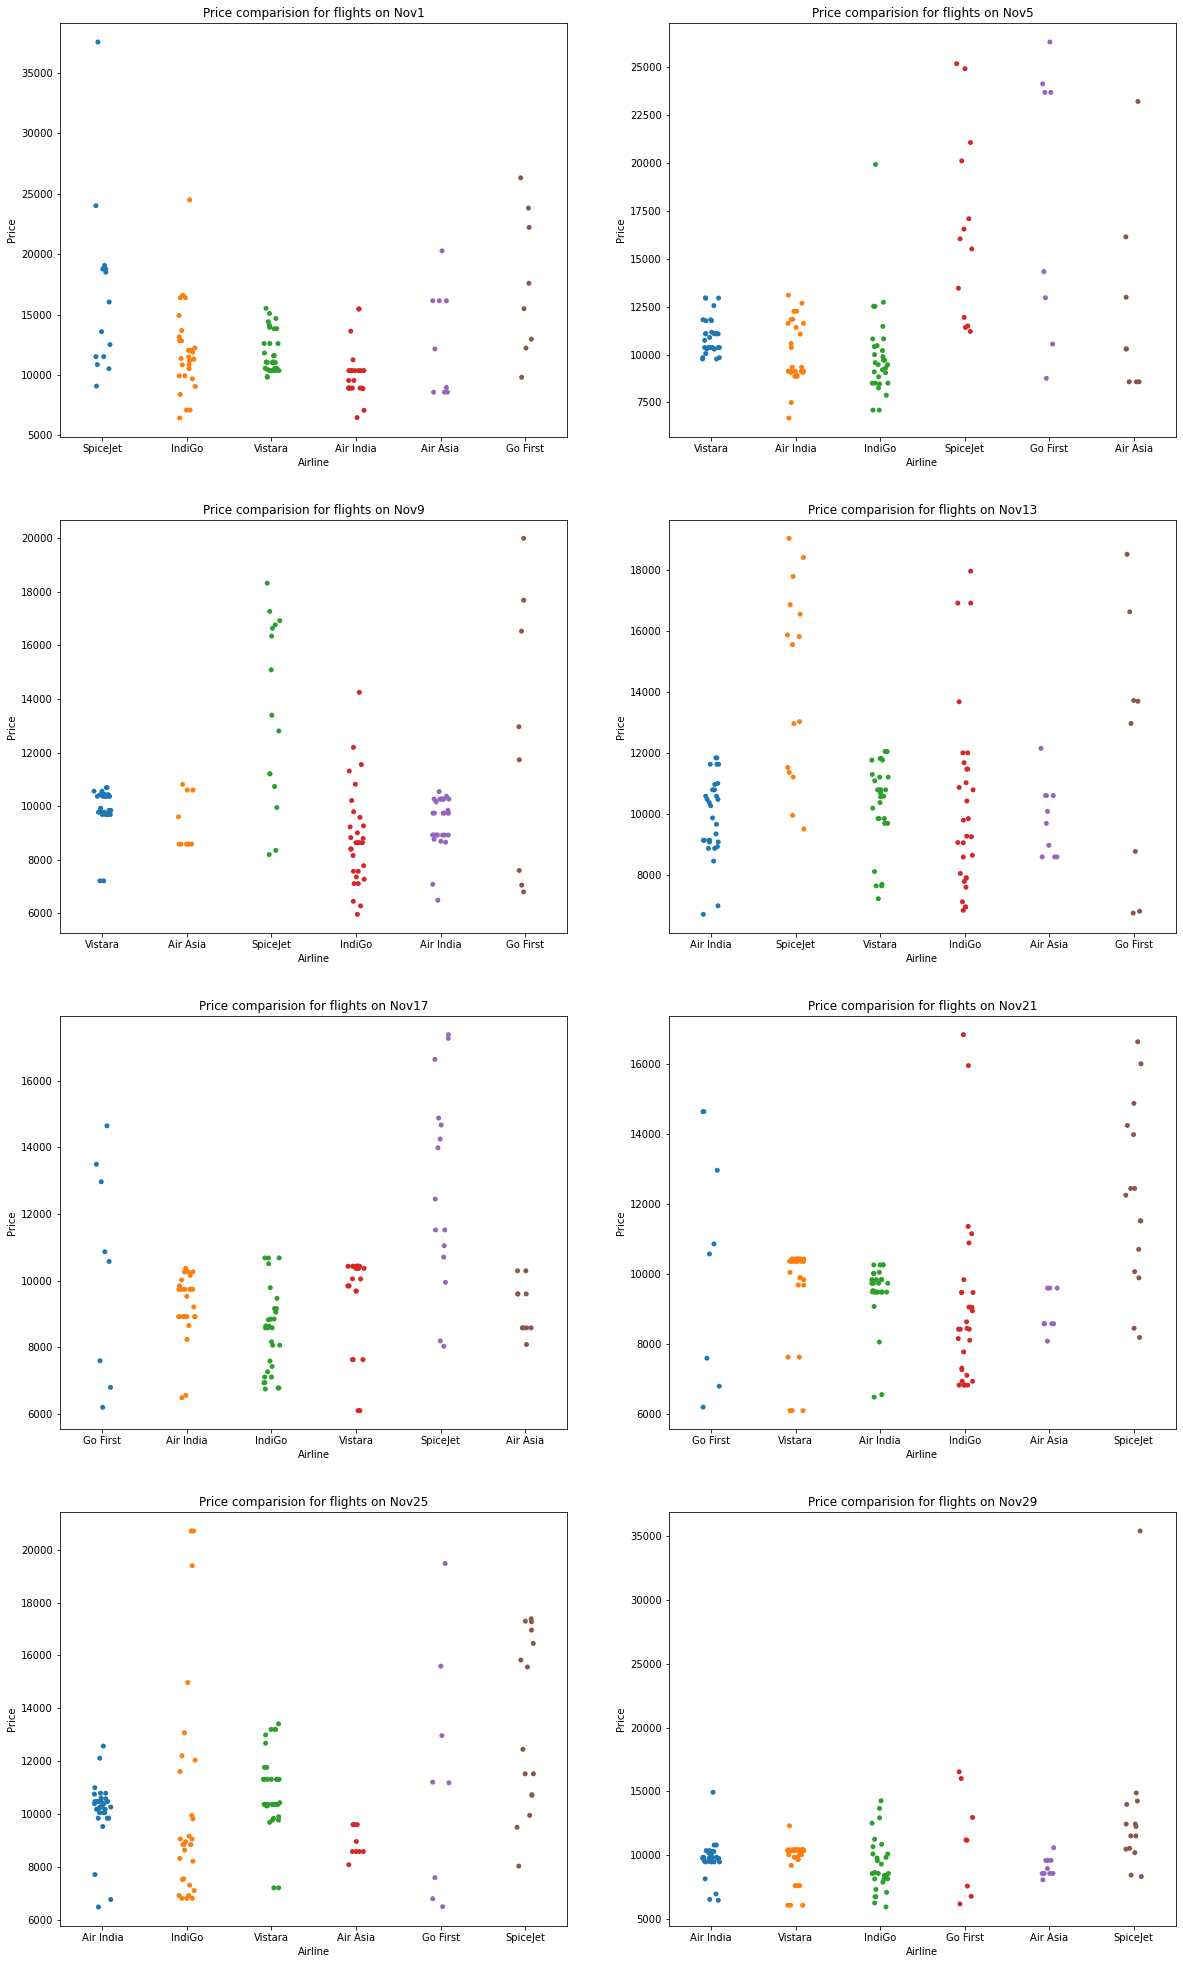

In [20]:
# Plots to compare price among different airlines on different dates in the month of November.
# These plots are for New Delhi-Mumbai route having 1 stop during the journey.

plt.figure(figsize=(20,35))
plotnumber=1
for day in np.arange(1,31,4):
    flight_df=df[(df['Destination']=='Mumbai')&(df['Stops']=='1 Stop')&(df['Month']==11)&(df['Day']==day)]
    plt.subplot(4,2,plotnumber)
    sns.stripplot(x='Airline',y='Price',data=flight_df)
    plt.title(f'Price comparision for flights on Nov{day}')
    plotnumber+=1

In [21]:
# Defining a function to plot the variation of fare of a flight over time. It takes a dataframe as arguement which has entries 
# for a specific flight(identified by Flight_ID).
def plot_flight_prices(flight_df):
    plt.figure(figsize=(15,12))
    months=['September','October','November','December']
    plotnumber=1
    for month in range(9,13):
        month_df=flight_df[flight_df['Month']==month]
        plt.subplot(2,2,plotnumber)
        try:
            sns.barplot(x='Day',y='Price',data=month_df)
            plt.xlabel(months[plotnumber-1],fontsize=15)
            plt.ylim(0,25000)
        except ValueError:
            pass
        plotnumber+=1

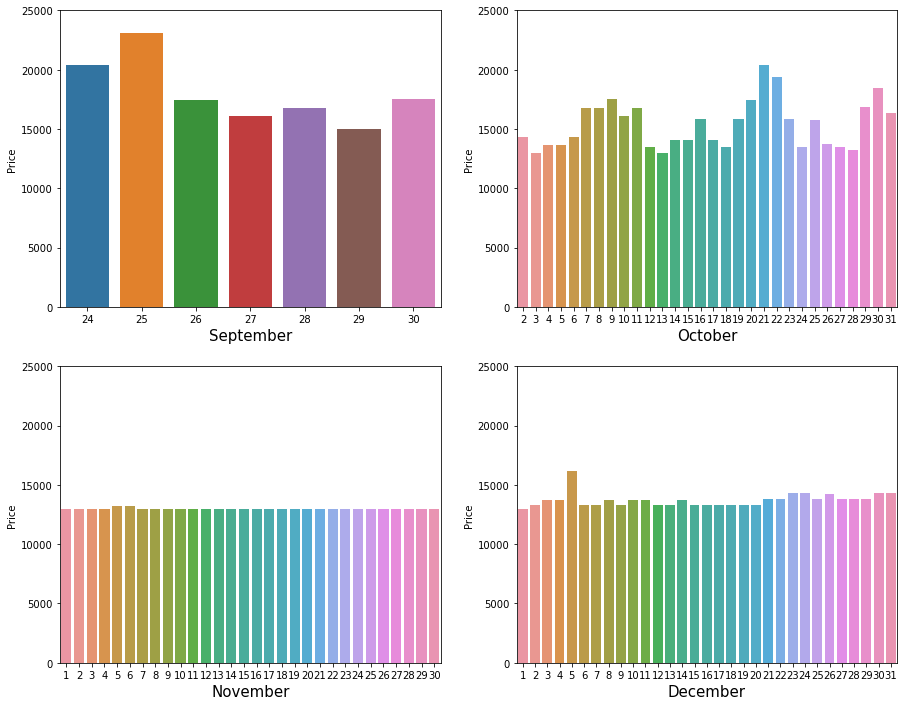

In [22]:
# Price variation of flight 'UK-993/773' over the months.
flight_df= df[df['Flight_ID']=='UK-993/773']
plot_flight_prices(flight_df)

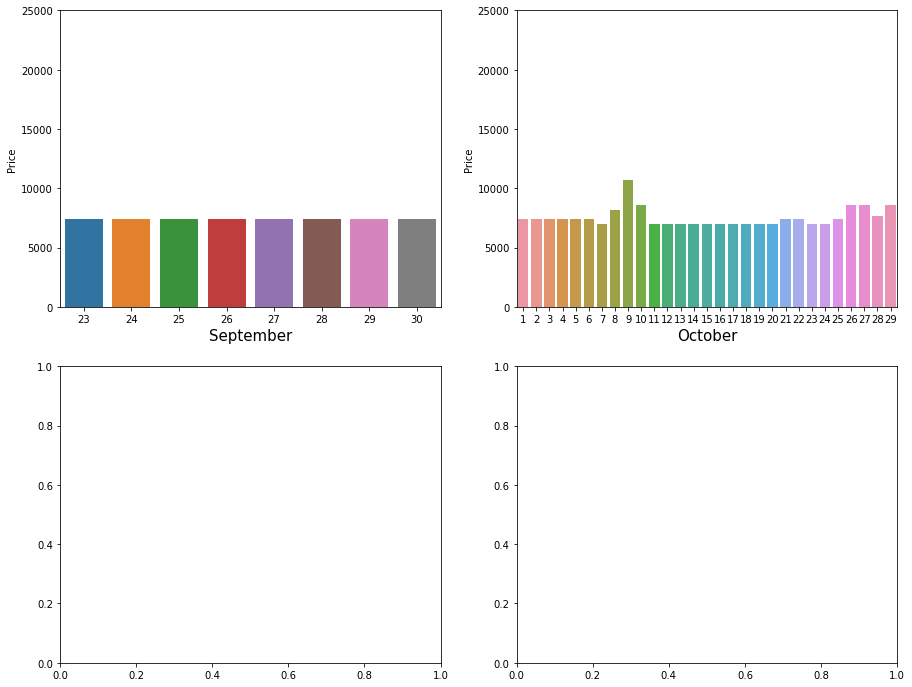

In [23]:
# Price variation of flight '6E-2048' over the months.
flight_df= df[df['Flight_ID']=='6E-2048']
plot_flight_prices(flight_df)

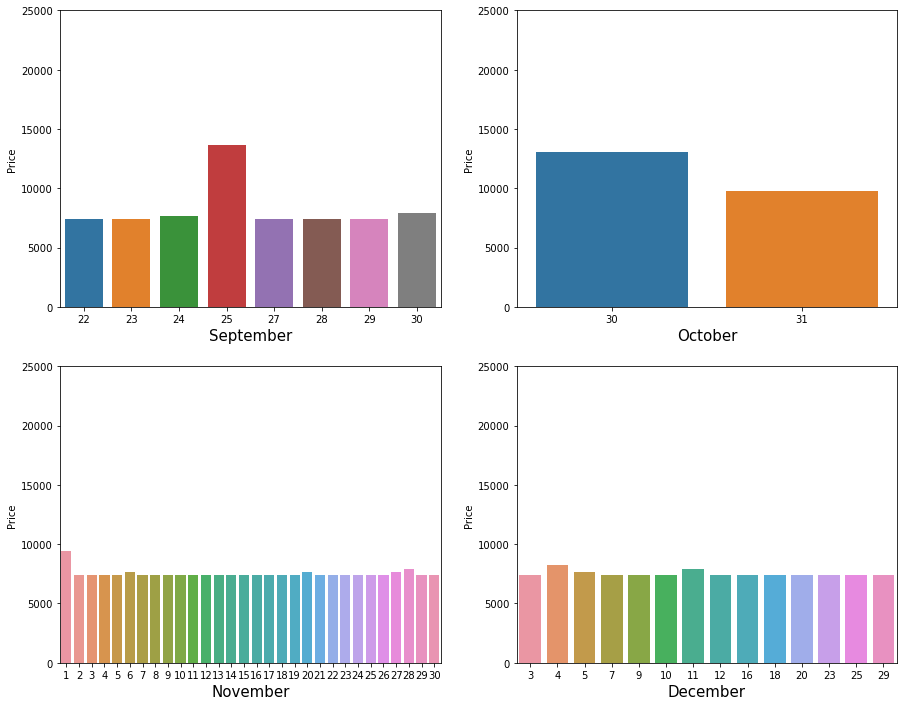

In [24]:
# Price variation of flight '6E-781' over the months.
flight_df= df[df['Flight_ID']=='6E-781']
plot_flight_prices(flight_df)

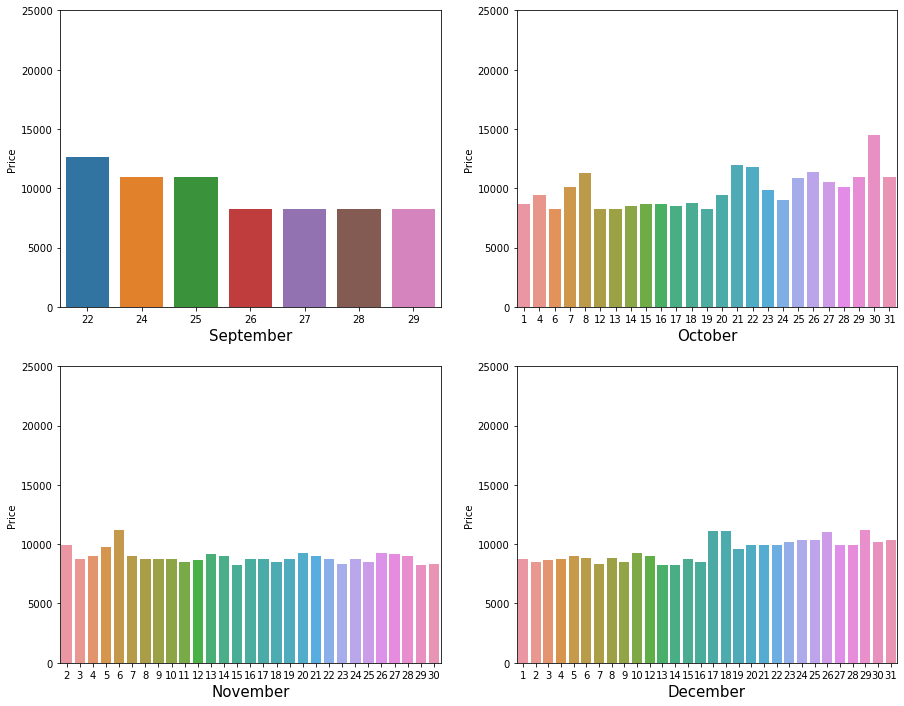

In [25]:
# Price variation of flight 'AI-678/641' over the months.
flight_df= df[df['Flight_ID']=='AI-678/641']
plot_flight_prices(flight_df)

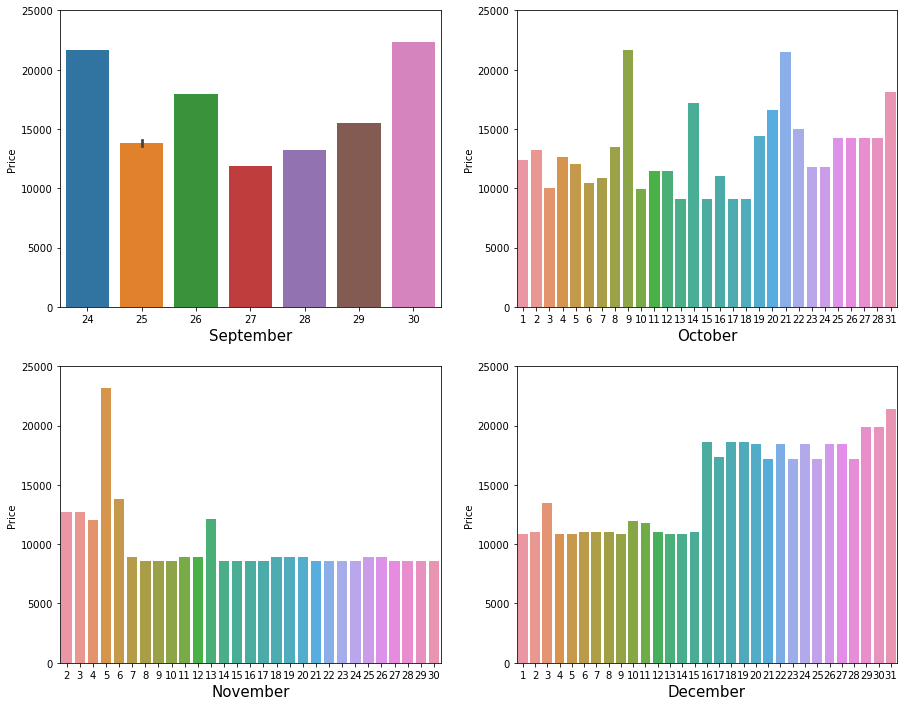

In [26]:
# Price variation of flight 'I5-857/334' over the months.
flight_df= df[df['Flight_ID']=='I5-857/334']
plot_flight_prices(flight_df)

In [27]:
df['Stops'].unique()

array(['1 Stop', '2 Stop(s)', 'Non Stop', '3 Stop(s)'], dtype=object)

In [28]:
# encoding the data using replace function.
df['Stops'].replace({'Non Stop':0, 
                     '1 Stop':1, 
                     '2 Stop(s)':2, 
                     '3 Stop(s)':3},inplace=True)
df['Stops'].unique()

array([1, 2, 0, 3], dtype=int64)

In [29]:
df['Ticket Status'].unique()

array(['Available', '1 left', '4 left', '2 left', '3 left'], dtype=object)

In [30]:
# encoding the data using replace function.
df['Ticket Status'].replace({'Available':0, 
                           '1 left':1, 
                           '2 left':2, 
                           '3 left':3,
                           '4 left':4},inplace=True)
df['Ticket Status'].unique()

array([0, 1, 4, 2, 3], dtype=int64)

In [31]:
# Encoding the categorical columns with label encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

def label_encode(column):
    df[column]= enc.fit_transform(df[[column]])

features_encode=['Flight_ID','Airline']
for i in features_encode:
    label_encode(i)
df

,Airline,Flight_ID,Departure Time,Destination,Duration,Stops,Price,Ticket Status,Day,Month
0,2,877,14.500000,Bangalore,7.916667,1,8155,0,14,10
1,2,858,18.083333,Bangalore,6.500000,1,8155,0,14,11
2,1,667,8.000000,Hyderabad,23.500000,1,9840,1,8,12
3,2,846,10.666667,Bangalore,4.333333,1,10708,1,16,10
4,0,951,6.083333,Bangalore,6.416667,1,7425,0,23,11
...,...,...,...,...,...,...,...,...,...,...
58788,1,744,14.000000,Bangalore,17.833333,1,9946,0,7,10
58789,3,389,10.250000,Mumbai,7.166667,1,7103,0,24,10
58790,2,820,18.500000,Kolkata,9.500000,1,8578,0,30,11
58791,5,1366,7.083333,Kolkata,12.833333,2,17198,0,30,10


In [32]:
# Encode the 'Destination' column using the get_dummies method of pandas.
df = pd.get_dummies(df, columns=['Destination'],drop_first=True)
df

,Airline,Flight_ID,Departure Time,Duration,Stops,Price,Ticket Status,Day,Month,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,2,877,14.500000,7.916667,1,8155,0,14,10,0,0,0
1,2,858,18.083333,6.500000,1,8155,0,14,11,0,0,0
2,1,667,8.000000,23.500000,1,9840,1,8,12,1,0,0
3,2,846,10.666667,4.333333,1,10708,1,16,10,0,0,0
4,0,951,6.083333,6.416667,1,7425,0,23,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58788,1,744,14.000000,17.833333,1,9946,0,7,10,0,0,0
58789,3,389,10.250000,7.166667,1,7103,0,24,10,0,0,1
58790,2,820,18.500000,9.500000,1,8578,0,30,11,0,1,0
58791,5,1366,7.083333,12.833333,2,17198,0,30,10,0,1,0


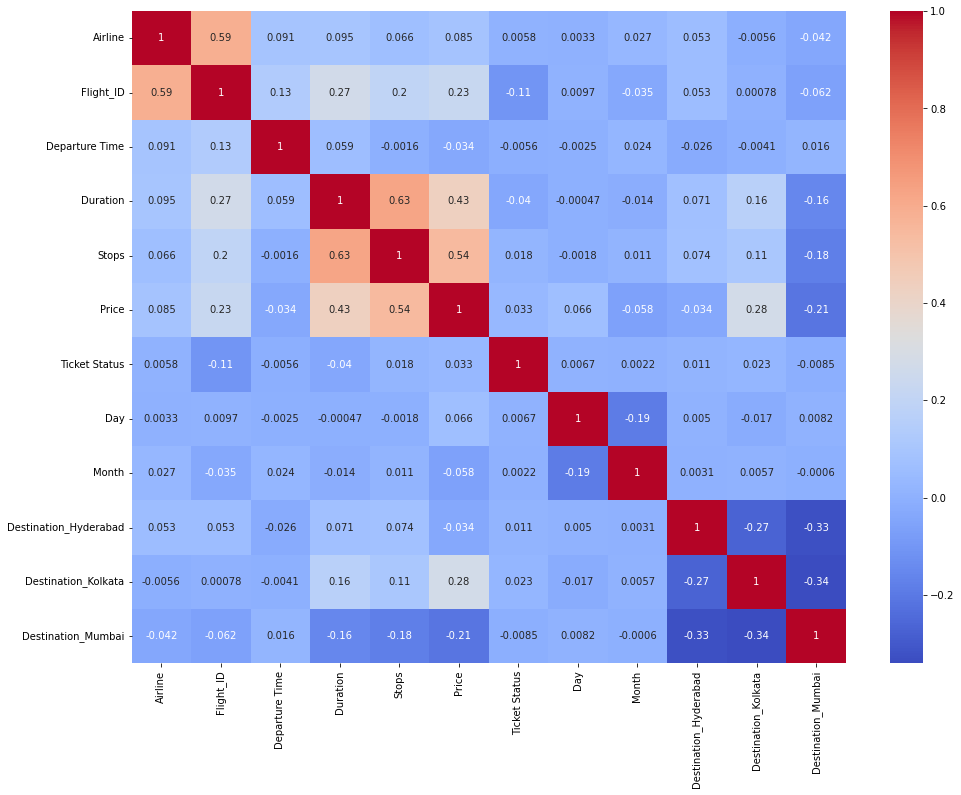

In [33]:
# Let's see the correlation heat-map.
corr_mat=df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
plt.savefig('correlation.png')

In [34]:
# Let's check the correlation of various features with the target variable.(Absolute values are shown)
corr_mat=df.corr()
np.abs(corr_mat["Price"]).sort_values(ascending= False)

Price                    1.000000
Stops                    0.541739
Duration                 0.432754
Destination_Kolkata      0.276457
Flight_ID                0.225150
Destination_Mumbai       0.212847
Airline                  0.084606
Day                      0.065938
Month                    0.058487
Destination_Hyderabad    0.034487
Departure Time           0.033659
Ticket Status            0.032602
Name: Price, dtype: float64

In [35]:
# Separating the features and label.
X= df.drop(columns=['Price'])
y= df['Price']

In [36]:
# applying standard scaler on the features and scaling them.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [37]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen.

         vif               Features
0   1.556510                Airline
1   1.698199              Flight_ID
2   1.024889         Departure Time
3   1.765621               Duration
4   1.685209                  Stops
5   1.023899          Ticket Status
6   1.038047                    Day
7   1.044394                  Month
8   1.384043  Destination_Hyderabad
9   1.420588    Destination_Kolkata
10  1.459822     Destination_Mumbai


In [38]:
# Check the R2 score for the different algorithms.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

lr= LinearRegression()
ada = AdaBoostRegressor()
rf= RandomForestRegressor()
xgb_reg= xgb.XGBRegressor()
knr= KNeighborsRegressor()

models = [lr,ada,rf,xgb_reg,knr]

def get_score(model,train_x,test_x,train_y,test_y):
    model.fit(train_x,train_y)
    pred_y= model.predict(test_x)
    accuracy_test = round(r2_score(test_y,pred_y),2)
    return accuracy_test

scores=[[],[],[],[],[]]
for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    for model in models:
        score= get_score(model,x_train,x_test,y_train,y_test)
        scores[i].append(score)
        
results= pd.DataFrame(scores,columns=['Linear Regression','Adaboost Regression','Random-Forests Regression','XGBoost Regression'
                                       ,'K-Neighbors Regression'],
                               index=['Train-Test Split 1','Train-Test Split 2','Train-Test Split 3','Train-Test Split 4',
                                      'Train-Test Split 5'])
results

,Linear Regression,Adaboost Regression,Random-Forests Regression,XGBoost Regression,K-Neighbors Regression
Train-Test Split 1,0.38,0.28,0.84,0.80,0.71
Train-Test Split 2,0.37,0.25,0.84,0.80,0.71
Train-Test Split 3,0.37,0.21,0.83,0.80,0.70
Train-Test Split 4,0.38,0.32,0.84,0.80,0.70
Train-Test Split 5,0.38,-0.46,0.84,0.79,0.70


In [39]:
# Cross-validation.
cv_scores=[[],[],[],[],[],[]]
count=0
for i in range(5,11):
    if i==5:
        print('Evaluating for 5-Fold...')
    for model in models:
        score= round(cross_val_score(model,X_scaled,y,cv=i,n_jobs=-1).mean(),2)
        cv_scores[count].append(score)
    count+=1
    if i==10:
        continue
    print(f'Evaluating for {i+1}-Fold...')
        
cv_results= pd.DataFrame(cv_scores,columns=['Linear Regression','Adaboost Regression','Random-Forests Regression',
                                         'XGBoost Regression','K-Neighbors Regression'],
                                  index=['5-Fold Cross-Validation','6-Fold Cross-Validation','7-Fold Cross-Validation',
                                         '8-Fold Cross-Validation','9-Fold Cross-Validation','10-Fold Cross-Validation'])
cv_results

Evaluating for 5-Fold...
Evaluating for 6-Fold...
Evaluating for 7-Fold...
Evaluating for 8-Fold...
Evaluating for 9-Fold...
Evaluating for 10-Fold...


,Linear Regression,Adaboost Regression,Random-Forests Regression,XGBoost Regression,K-Neighbors Regression
5-Fold Cross-Validation,0.38,0.16,0.85,0.8,0.72
6-Fold Cross-Validation,0.38,0.19,0.85,0.8,0.72
7-Fold Cross-Validation,0.38,0.18,0.85,0.8,0.72
8-Fold Cross-Validation,0.38,0.17,0.85,0.8,0.72
9-Fold Cross-Validation,0.38,0.19,0.85,0.8,0.73
10-Fold Cross-Validation,0.38,0.21,0.85,0.8,0.73


In [73]:
# Hyperparameter tuning of Random-Forests model.
from sklearn.model_selection import GridSearchCV

params= {"n_estimators": [250,500,1000],
         "max_depth": [None,15,25,35],
         "max_features": [0.75,1.0],
         "max_samples": [0.75,1.0],
         "bootstrap":[True,False]
         }

grd= GridSearchCV(rf, param_grid=params,cv=3,verbose=2,n_jobs=-1)
grd.fit(x_train,y_train)
print("Best Parameters:",grd.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 1000}


In [41]:
# Performance of the tuned random-forests model on a random train test split.
rf_tuned= RandomForestRegressor(max_depth=None,max_features=0.75,max_samples=1.0,n_estimators=1000,bootstrap=True,n_jobs=-1)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=np.random.randint(0,100))

rf_tuned.fit(x_train,y_train)
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = r2_score(y_train,y_pred_train)
y_pred= rf_tuned.predict(x_test)
accuracy_test = r2_score(y_test,y_pred)

print("Training Score:",round(accuracy_train,2))
print("Testing Score: ",round(accuracy_test,2))

Training Score: 0.98
Testing Score:  0.85


In [44]:
# Saving the tuned Random-Forests model.
import pickle 
Flight_Price= "Flight_Price_model.pickle"
pickle.dump(rf_tuned,open(Flight_Price,'wb'))